In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
from hod.utils.get_para_abacus_summit import get_cosmo_para, get_hod_para

# All cosmo parameters, emulator grid

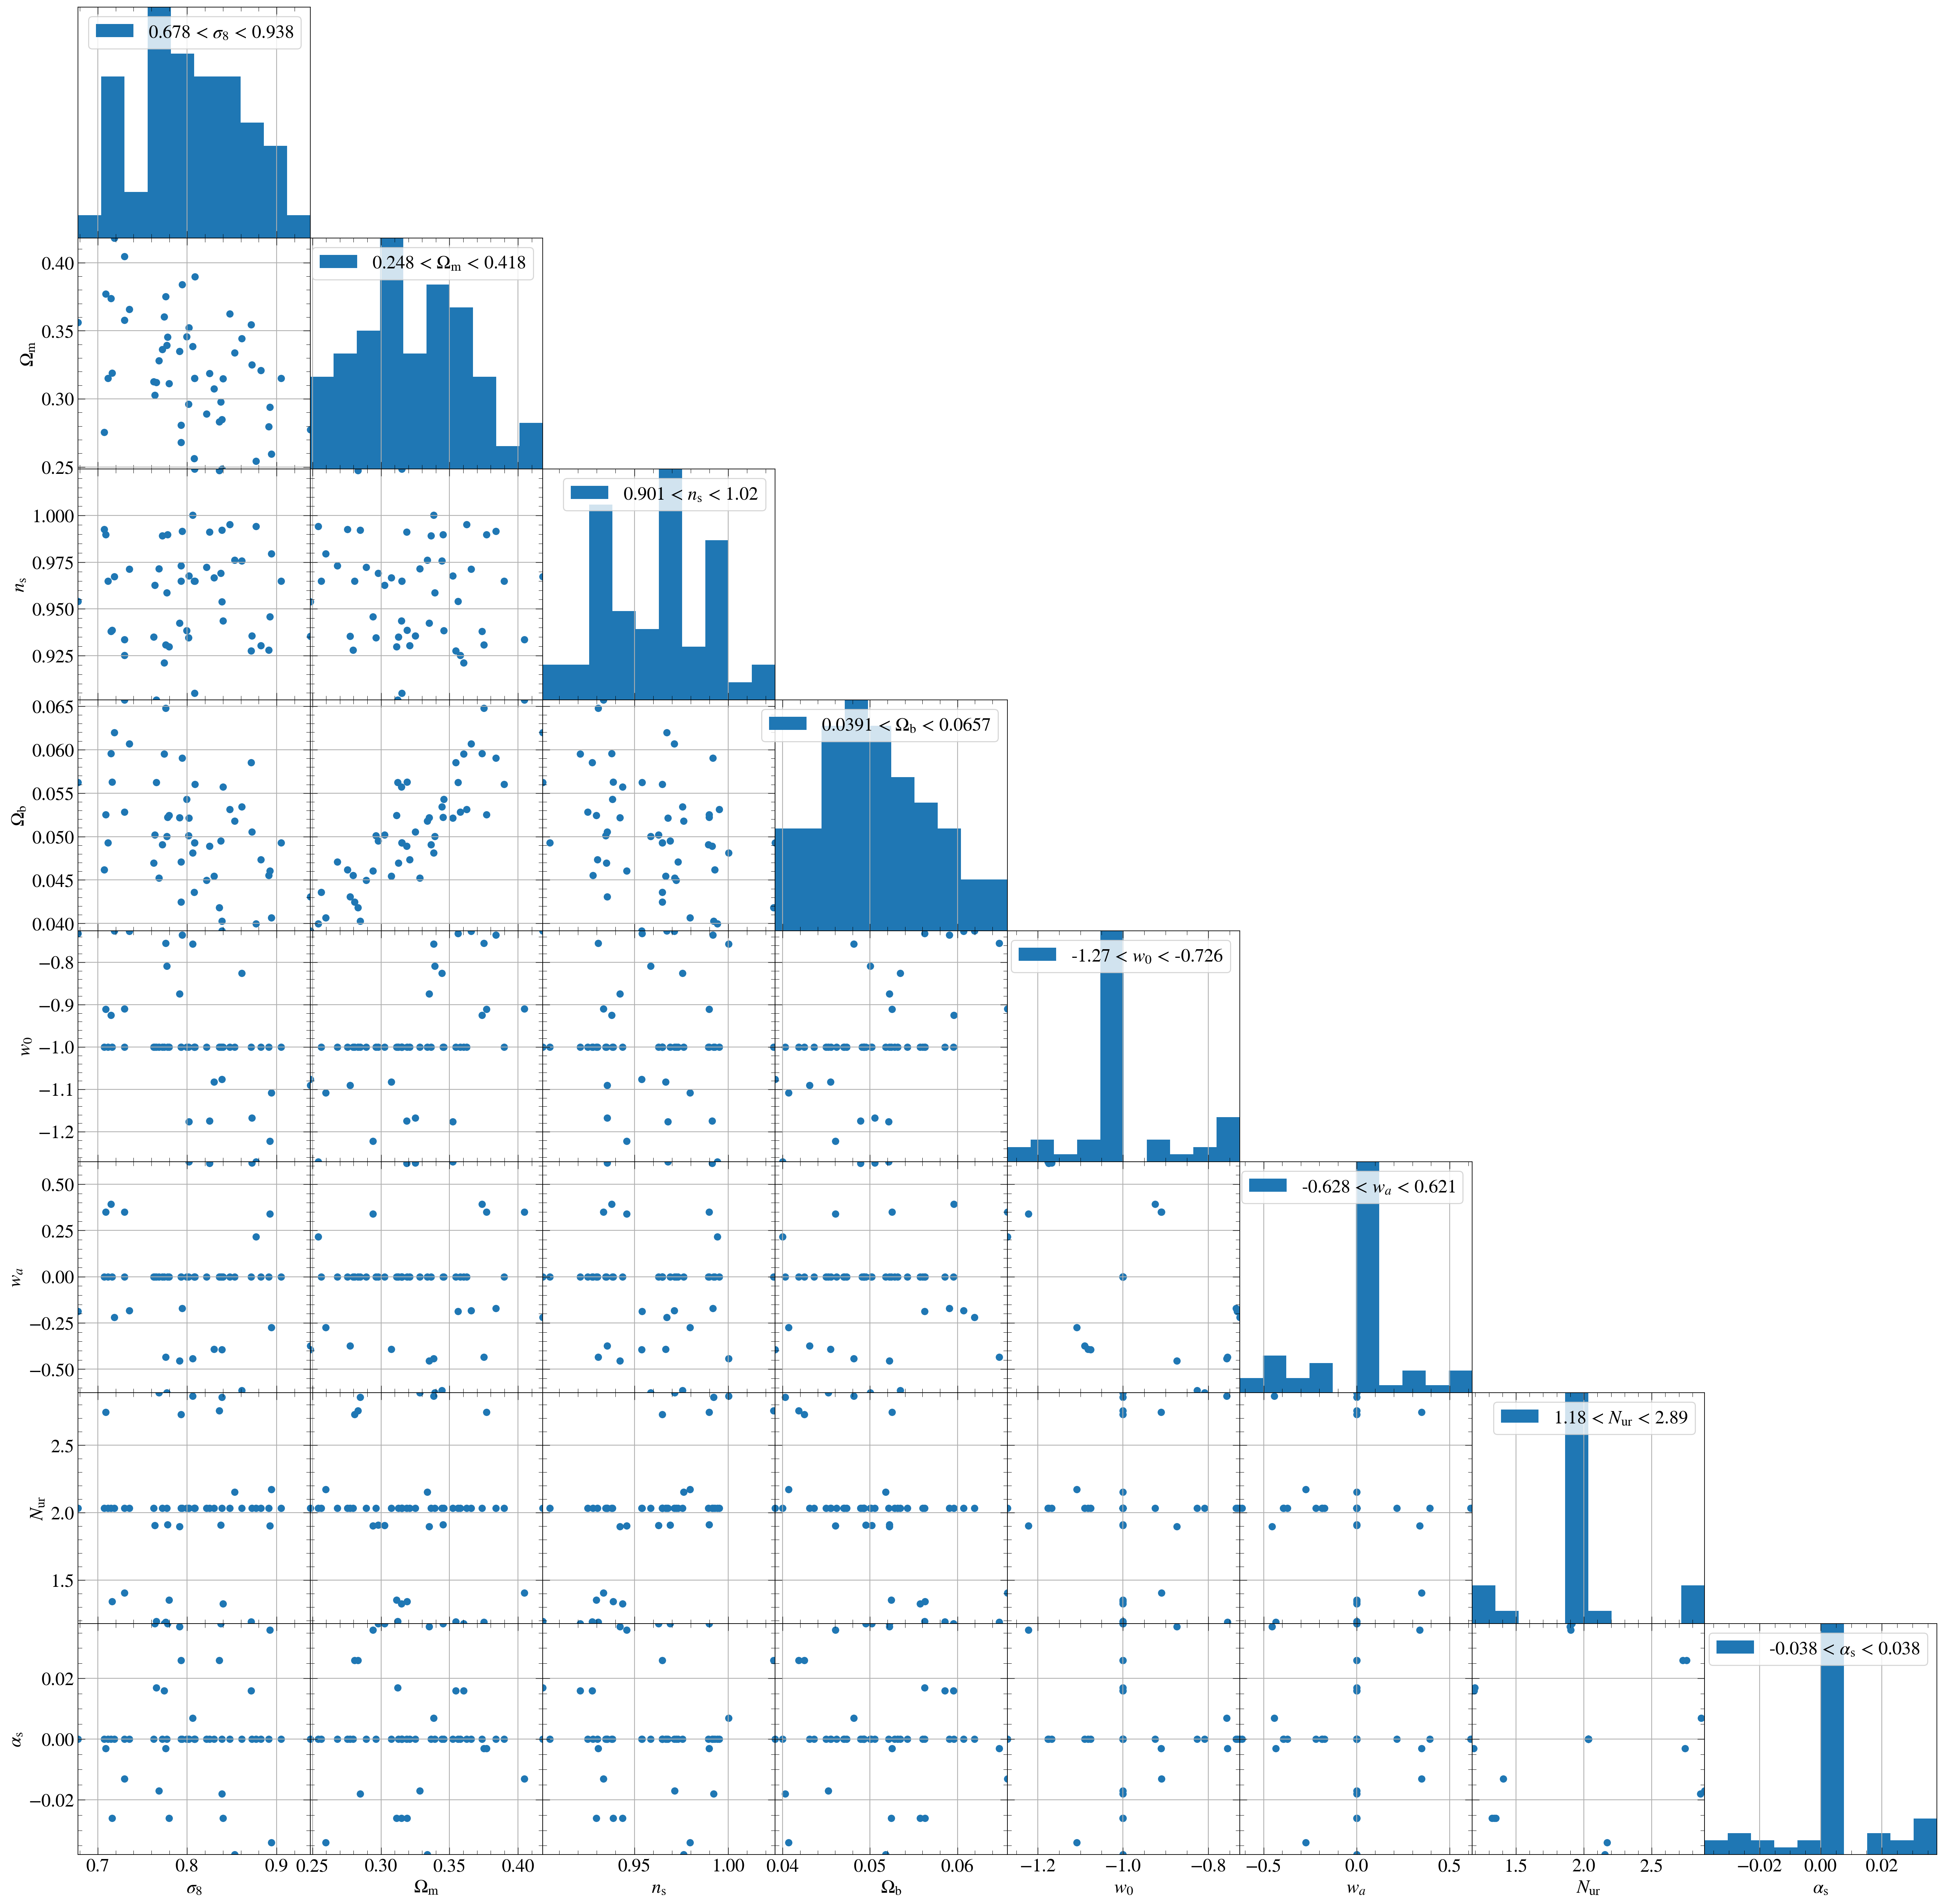

In [2]:
# There's a better way for doing this but I can't find that code today.

key_list = ['sigma8', 'OmegaM', 'ns', 'OmegaB', 'w0', 'wa', 'Nur', 'alpha_s']

label_list = [r'$\sigma_8$', r'$\Omega_{\rm m}$', 
r'$n_{\rm s}$', r'$\Omega_{\rm b}$', r'$w_0$', f'$w_a$', 
r'$N_{\rm ur}$', r'$\alpha_{\rm s}$']

ndim = len(key_list)
fig, axes = plt.subplots(ndim, ndim, figsize=(ndim*4, ndim*4),
                         gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(0, ndim):
    for j in range(0, ndim):
        ax = axes[j, i] # note: j, i
        key1 = key_list[i]
        key2 = key_list[j]

        if i > j:
            ax.set_visible(False)
        
        if i <= j:
            para1 = []
            para2 = []
            for cosmo_id in range(130,182):
                cosmo_abacus = get_cosmo_para(cosmo_id)
                para1.append(cosmo_abacus[key1])
                para2.append(cosmo_abacus[key2])
                
            if i < j:
                ax.scatter(para1, para2)
            else:
                ax.hist(para1, density=True, label='%.3g < %s < %.3g'%(min(para1), label_list[i], max(para1)))
                ax.legend() 
                ax.set_yticks([]) # no yticks on the diagonal
                ax.set_yticklabels([])
                
        # j is the row, i is the column
        if i > 0:
            ax.set_yticklabels([])
            
        if i==0 and j > 0: # first column has y-labels
            ax.set_ylabel(label_list[j])       
        if j==ndim-1: # last rwo has y-labels
            ax.set_xlabel(label_list[i])
            
plt.savefig('../../plots/abacus_parameter_space.pdf')

# $H_0$ ($\theta_*$ prior)

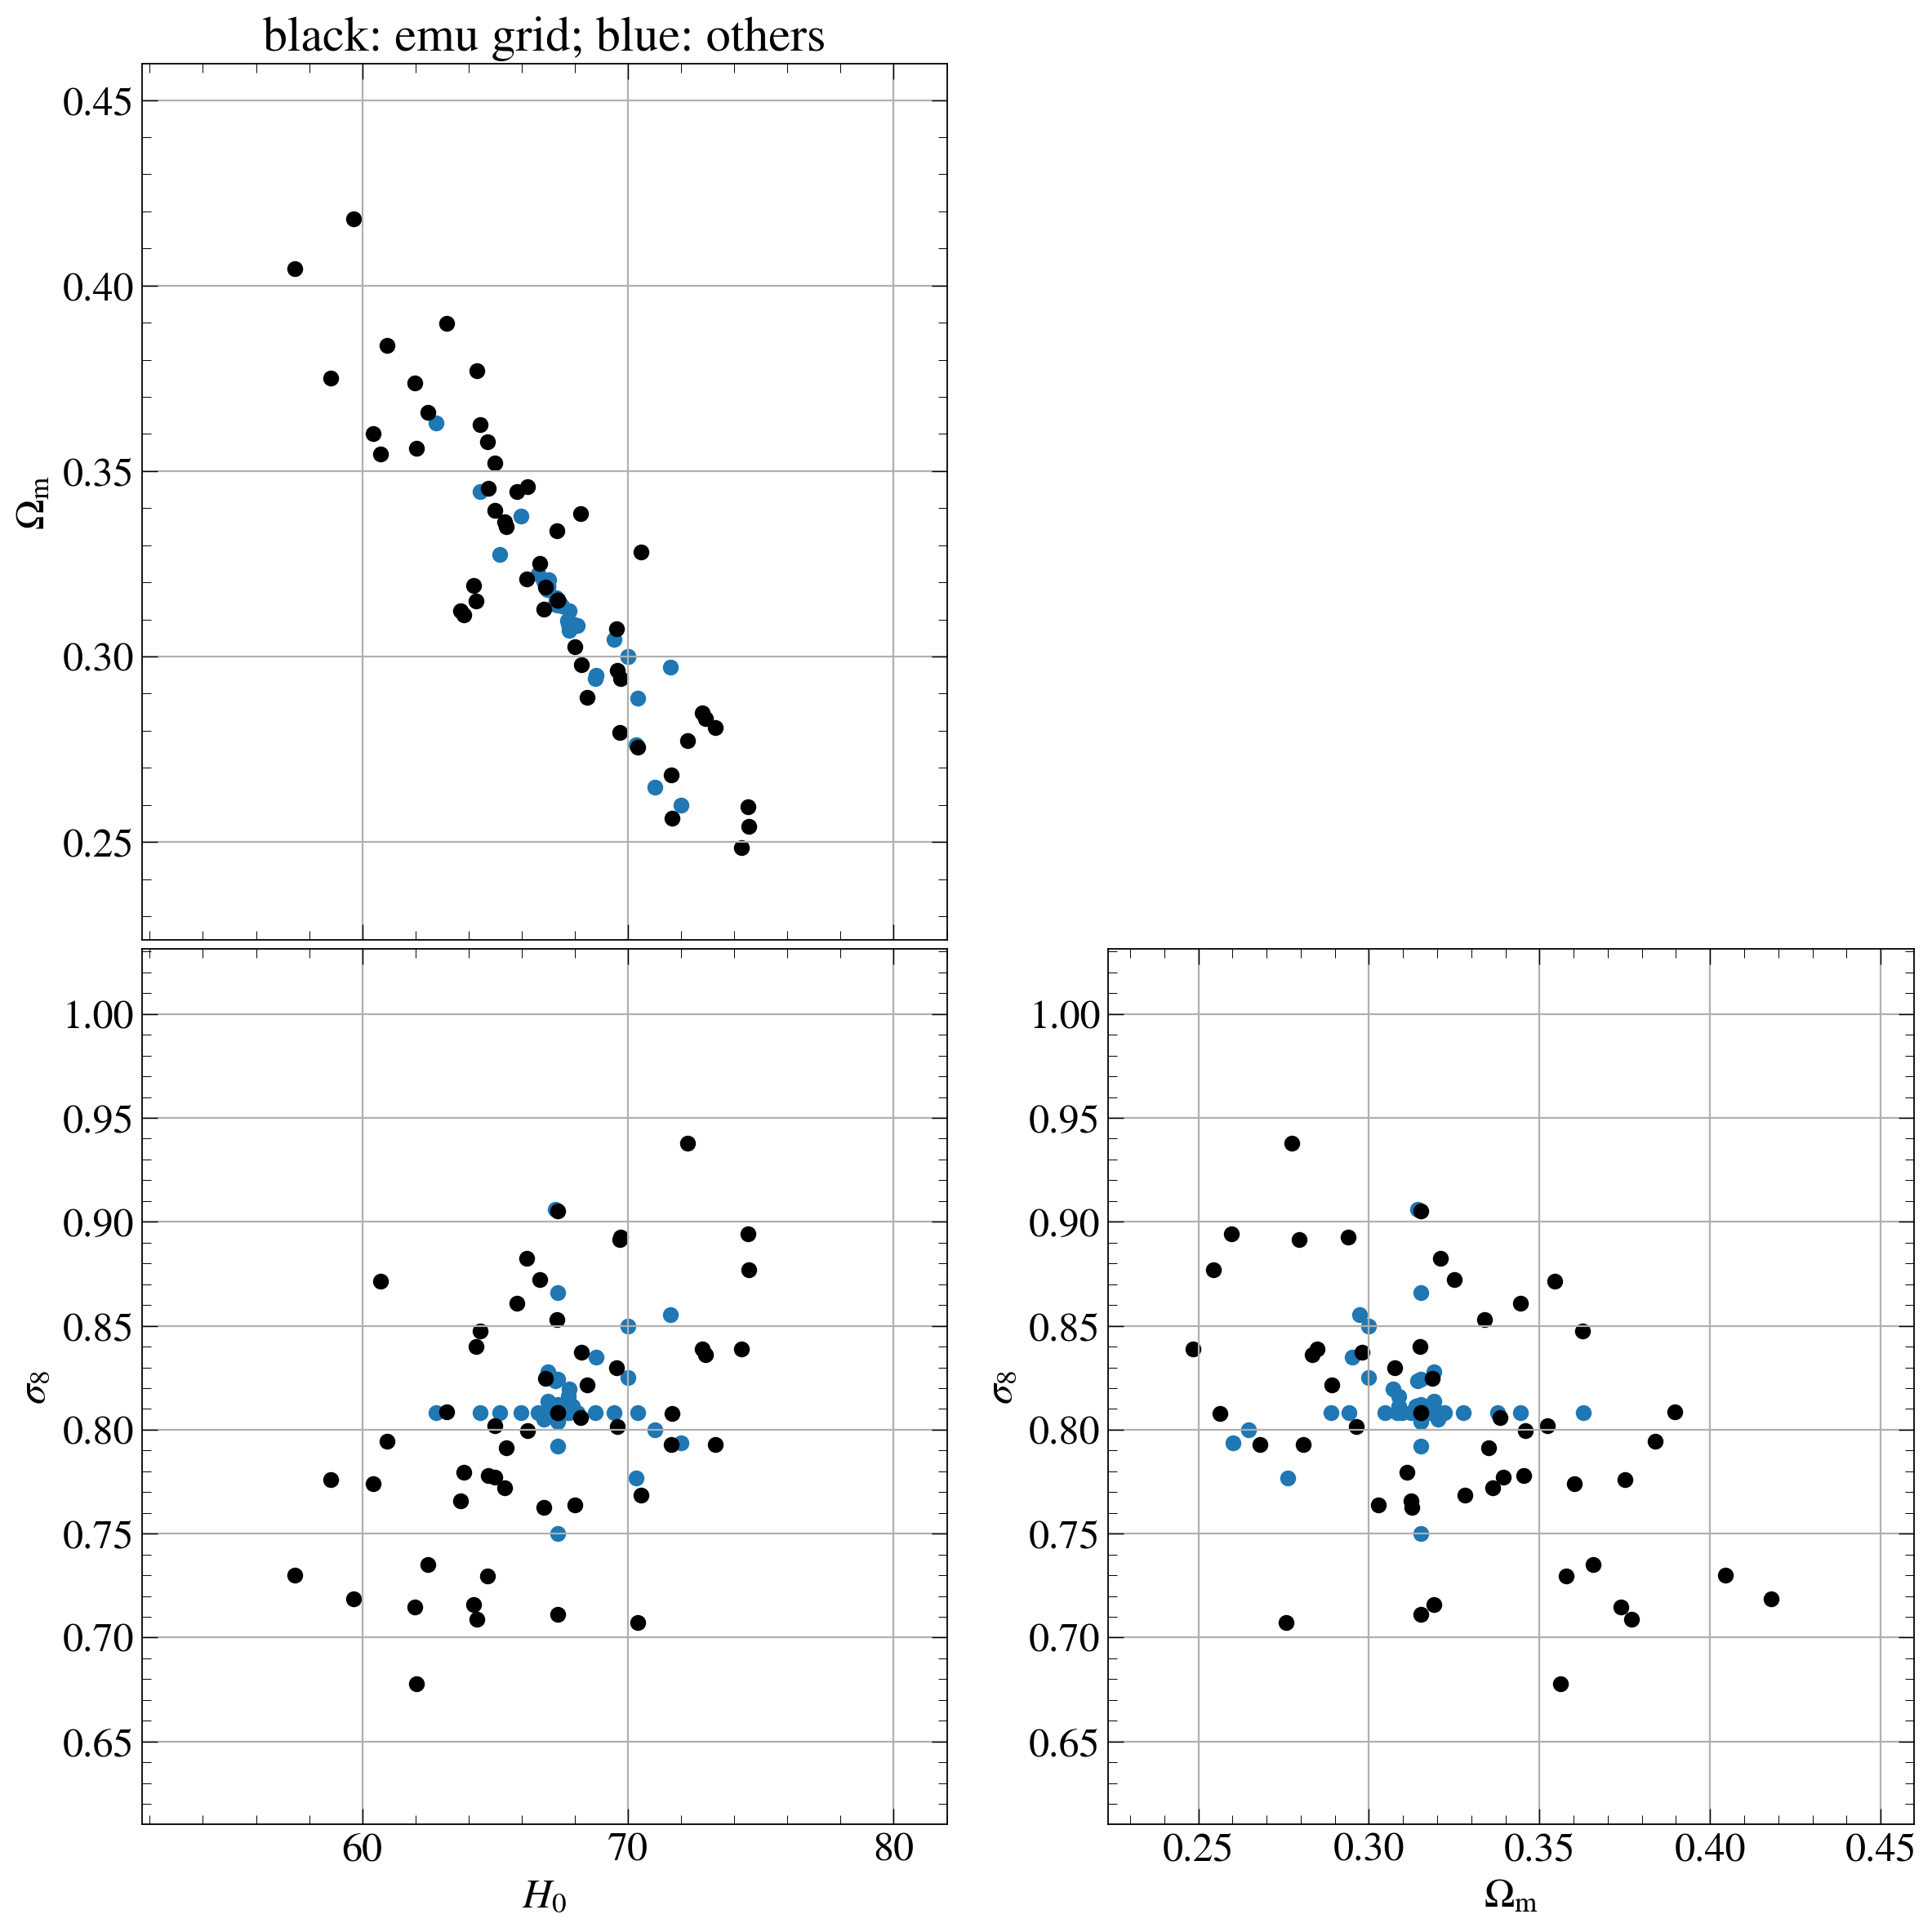

In [3]:

plt.figure(figsize=(14,14))
H0_list = []
Om0_list = []
sigma8_list = []

for cosmo_id in range(182):#range(130,182):
    cosmo_abacus = get_cosmo_para(cosmo_id)
    #print(cosmo_id, cosmo_abacus)
    if cosmo_abacus != None:
        Om0 = cosmo_abacus['OmegaM']
        H0 = cosmo_abacus['hubble']*100
        sigma8 = cosmo_abacus['sigma8']
        
        Om0_list.append(Om0)
        H0_list.append(H0)
        sigma8_list.append(sigma8)
            
        if cosmo_id >= 130: # and cosmo_id < 182:
            c = 'k'
        else: 
            c = 'C0'
        
        plt.subplot(2,2,1)
        plt.scatter(H0, Om0, c=c)
        plt.xlabel(r'$H_0$')
        plt.ylabel(r'$\Omega_{\rm m}$')
        
        plt.subplot(2,2,3)
        plt.scatter(H0, sigma8, c=c)
        plt.xlabel(r'$H_0$')
        plt.ylabel(r'$\sigma_8$')
        
        plt.subplot(2,2,4)
        plt.scatter(Om0, sigma8, c=c)
        plt.xlabel(r'$\Omega_{\rm m}$')
        plt.ylabel(r'$\sigma_8$')

plt.subplot(2, 2, 1)
plt.xlim(0.9*min(H0_list), 1.1*max(H0_list))
plt.ylim(0.9*min(Om0_list), 1.1*max(Om0_list))

plt.subplot(2, 2, 3)
plt.xlim(0.9*min(H0_list), 1.1*max(H0_list))
plt.ylim(0.9*min(sigma8_list), 1.1*max(sigma8_list))

plt.subplot(2, 2, 4)
plt.xlim(0.9*min(Om0_list), 1.1*max(Om0_list))
plt.ylim(0.9*min(sigma8_list), 1.1*max(sigma8_list))

plt.subplot(2, 2, 1)
plt.title('black: emu grid; blue: others');